### Importación de datos



In [ ]:
import folium
from folium.plugins import HeatMap
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:,.0f}'.format

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1); tienda1['Tienda'] = 'Tienda1'
tienda2 = pd.read_csv(url2); tienda2['Tienda'] = 'Tienda2'
tienda3 = pd.read_csv(url3); tienda3['Tienda'] = 'Tienda3'
tienda4 = pd.read_csv(url4); tienda4['Tienda'] = 'Tienda4'

df = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

tiendas = {
    'Tienda 01': tienda1,
    'Tienda 02': tienda2,
    'Tienda 03': tienda3,
    'Tienda 04': tienda4
}

#1. Análisis de facturación



,Tienda,Ventas
0,Tienda 01,"1,150,880,400"
1,Tienda 02,"1,116,343,500"
2,Tienda 03,"1,098,019,600"
3,Tienda 04,"1,038,375,700"


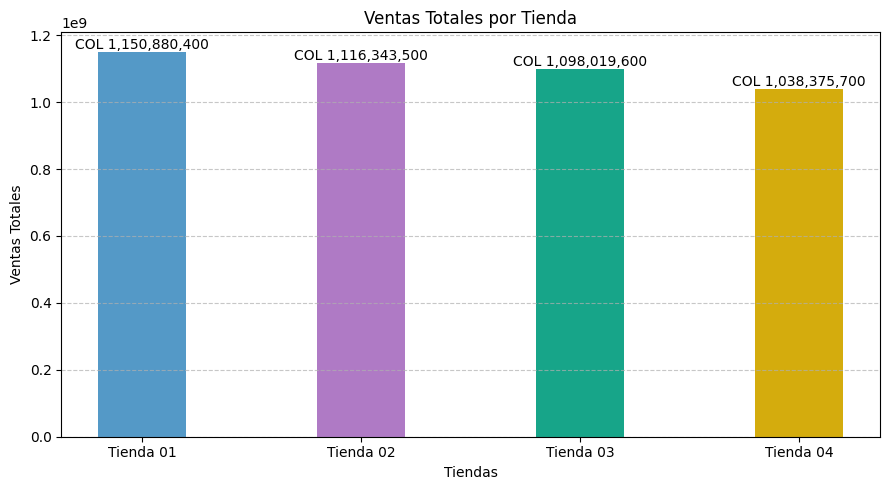

In [ ]:
colores = ['#5499c7', '#af7ac5', '#17a589', '#d4ac0d']
Vent = {nombre: df['Precio'].sum() for nombre, df in tiendas.items()}
venta_df = pd.DataFrame(
    list(Vent.items()),
    columns=['Tienda', 'Ventas']
)
display(venta_df)

plt.figure(figsize=(9, 5))
barras = plt.bar(venta_df['Tienda'], venta_df['Ventas'], color=colores, width=0.4)
plt.title('Ventas Totales por Tienda')
plt.ylabel('Ventas Totales')
plt.xlabel('Tiendas')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval, f"COL {yval:,.0f}",
             ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 2. Ventas por categoría


=== Ventas por Categoría por Tienda ===


,Tienda 01,Tienda 02,Tienda 03,Tienda 04
Categoría del Producto,,,,
Artículos para el hogar,171,181,177,201
Deportes y diversión,284,275,277,277
Electrodomésticos,312,305,278,254
Electrónicos,448,422,451,451
Instrumentos musicales,182,224,177,170
Juguetes,324,313,315,338
Libros,173,197,185,187
Muebles,465,442,499,480


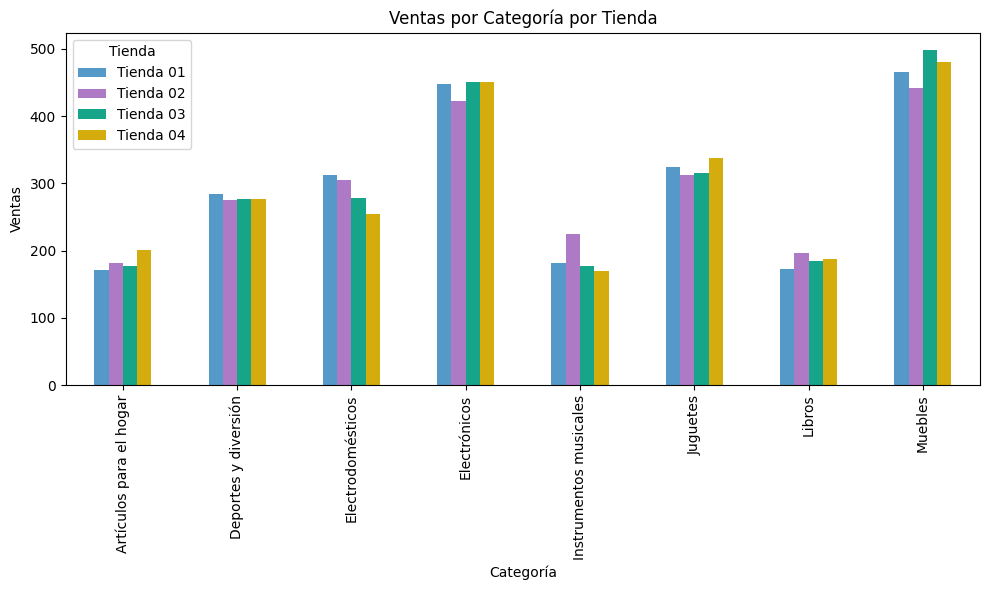

In [ ]:
colores = ['#5499c7', '#af7ac5', '#17a589', '#d4ac0d']
ventas_categoria = {}
for nombre, df in tiendas.items():
    conteo = df['Categoría del Producto'].value_counts()
    ventas_categoria[nombre] = conteo
ventas_cat = {nombre: df['Categoría del Producto'].value_counts() for nombre, df in tiendas.items()}
ventas_cat_df = pd.DataFrame(ventas_cat).fillna(0).astype(int)
print("\n=== Ventas por Categoría por Tienda ===")
display(ventas_cat_df)

ventas_cat_df.plot(kind='bar', figsize=(10,6), color=colores)
plt.title('Ventas por Categoría por Tienda')
plt.xlabel('Categoría')
plt.ylabel('Ventas')
plt.xticks(rotation=90)
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()

In [ ]:
tienda1.groupby(['Categoría del Producto'])[['Precio']].count().sort_values('Precio',ascending=False)

,Precio
Categoría del Producto,
Muebles,465
Electrónicos,448
Juguetes,324
Electrodomésticos,312
Deportes y diversión,284
Instrumentos musicales,182
Libros,173
Artículos para el hogar,171


In [ ]:
tienda2.groupby(['Categoría del Producto'])[['Precio']].count().sort_values('Precio',ascending=False)

,Precio
Categoría del Producto,
Muebles,442
Electrónicos,422
Juguetes,313
Electrodomésticos,305
Deportes y diversión,275
Instrumentos musicales,224
Libros,197
Artículos para el hogar,181


In [ ]:
tienda3.groupby(['Categoría del Producto'])[['Precio']].count().sort_values('Precio',ascending=False)

,Precio
Categoría del Producto,
Muebles,499
Electrónicos,451
Juguetes,315
Electrodomésticos,278
Deportes y diversión,277
Libros,185
Artículos para el hogar,177
Instrumentos musicales,177


In [ ]:
tienda4.groupby(['Categoría del Producto'])[['Precio']].count().sort_values('Precio',ascending=False)

,Precio
Categoría del Producto,
Muebles,480
Electrónicos,451
Juguetes,338
Deportes y diversión,277
Electrodomésticos,254
Artículos para el hogar,201
Libros,187
Instrumentos musicales,170


# 3. Calificación promedio de la tienda



=== Valoracion Promedio por Tienda ===


,Tienda,Valoracion Promedio
0,Tienda 01,4
1,Tienda 02,4
2,Tienda 03,4
3,Tienda 04,4


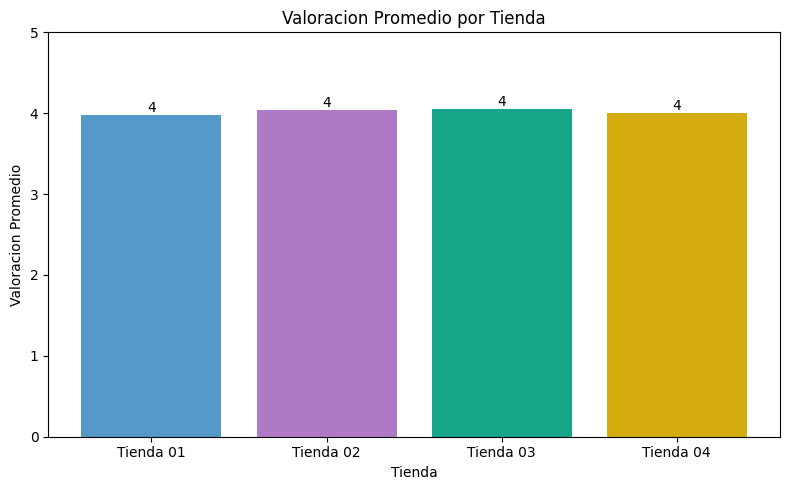

In [ ]:
colores = ['#5499c7', '#af7ac5', '#17a589', '#d4ac0d']
Valor = {nombre: df['Calificación'].mean() for nombre, df in tiendas.items()}
Valor_df = pd.DataFrame(list(Valor.items()), columns=['Tienda', 'Valoracion Promedio'])
Valor_df['Valoracion Promedio'] = Valor_df['Valoracion Promedio'].round(2)
print("\n=== Valoracion Promedio por Tienda ===")
display(Valor_df)

plt.figure(figsize=(8,5))
barras = plt.bar(Valor_df['Tienda'], Valor_df['Valoracion Promedio'], color=colores)
plt.title('Valoracion Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Valoracion Promedio')
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval, f"{yval:,.0f}",
             ha='center', va='bottom', fontsize=10)
plt.ylim(0,5)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos


=== Top 5 Productos más vendidos por Tienda ===


,Tienda 01,Tienda 02,Tienda 03,Tienda 04
Producto,,,,
Armario,60,0,0,0
Batería,0,61,0,0
Cama box,0,0,0,62
Cama king,0,0,56,56
Carrito de control remoto,0,0,0,55
Cubertería,0,0,0,59
Dashboards con Power BI,0,0,0,56
Guitarra acústica,0,58,0,0
Iniciando en programación,0,65,0,0


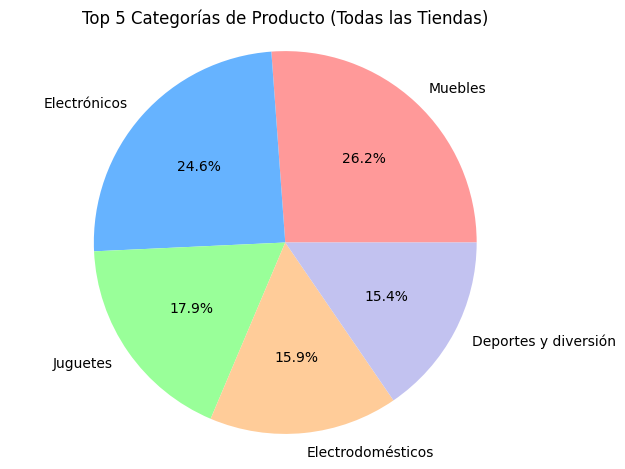

In [ ]:
colores = ['#5499c7', '#af7ac5', '#17a589', '#d4ac0d']
print("\n=== Top 5 Productos más vendidos por Tienda ===")
ventas_productos = {}
for nombre, df in tiendas.items():
    conteo = df['Producto'].value_counts().head(5)
    ventas_productos[nombre] = conteo
ventas_prod = {nombre: df['Producto'].value_counts().head(5) for nombre, df in tiendas.items()}
ventas_prod_df = pd.DataFrame(ventas_prod).fillna(0).astype(int)

display(ventas_prod_df)

colores_personalizados = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']
combined = pd.concat(tiendas.values(), ignore_index=True)
cat_counts = combined['Categoría del Producto'].value_counts().head(5)
plt.figure()
plt.pie(cat_counts.values, labels=cat_counts.index, autopct='%1.1f%%', colors=colores_personalizados)
plt.title('Top 5 Categorías de Producto (Todas las Tiendas)')
plt.axis('equal')
plt.tight_layout()
plt.show()


=== Top 5 Productos Menos vendidos por Tienda ===


,Tienda 01,Tienda 02,Tienda 03,Tienda 04
Producto,,,,
Armario,0,0,0,34
Auriculares,0,37,0,0
Auriculares con micrófono,33,0,0,0
Bloques de construcción,0,0,35,0
Celular ABXY,33,0,0,0
Ciencia de datos con Python,39,0,0,38
Guitarra acústica,0,0,0,37
Guitarra eléctrica,0,0,38,33
Impresora,0,34,0,0


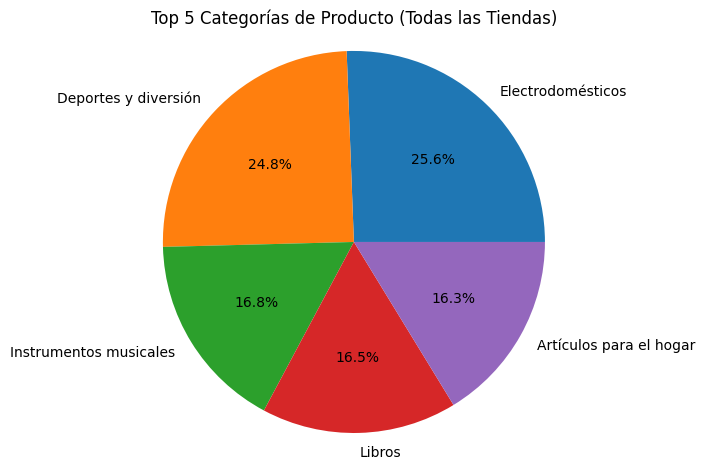

In [ ]:
colores = ['#5499c7', '#af7ac5', '#17a589', '#d4ac0d']
print("\n=== Top 5 Productos Menos vendidos por Tienda ===")

ventas_productos = {}
for nombre, df in tiendas.items():
    conteo = df['Producto'].value_counts().tail(5)
    ventas_productos[nombre] = conteo
ventas_prod = {nombre: df['Producto'].value_counts().tail(5) for nombre, df in tiendas.items()}
ventas_prod_df = pd.DataFrame(ventas_prod).fillna(0).astype(int)

display(ventas_prod_df)

combined = pd.concat(tiendas.values(), ignore_index=True)
cat_counts = combined['Categoría del Producto'].value_counts().tail(5)
plt.figure()
plt.pie(cat_counts.values, labels=cat_counts.index, autopct='%1.1f%%')
plt.title('Top 5 Categorías de Producto (Todas las Tiendas)')
plt.axis('equal')
plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

,Tienda,Costo de envío promedio
0,Tienda 01,"26,019"
1,Tienda 02,"25,216"
2,Tienda 03,"24,806"
3,Tienda 04,"23,459"


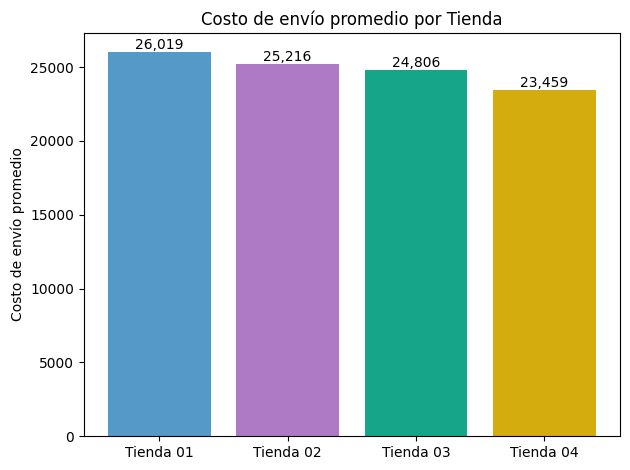

In [ ]:
colores = ['#5499c7', '#af7ac5', '#17a589', '#d4ac0d']
envio_promedio = {nombre: df['Costo de envío'].mean() for nombre, df in tiendas.items()}
envio_df = pd.DataFrame(
    list(envio_promedio.items()),
    columns=['Tienda', 'Costo de envío promedio']
)
display(envio_df)

plt.figure()
barras = plt.bar(envio_df['Tienda'], envio_df['Costo de envío promedio'], color= colores)
plt.ylabel('Costo de envío promedio')
plt.title('Costo de envío promedio por Tienda')
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval, f"{yval:,.0f}",
             ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

"""
## Conclusión del análisis

Luego de comparar las **ventas totales**, la **valoración promedio**, la **variedad de productos**, y el **costo de envío**, se observa lo siguiente:

- **Tienda2** tiene las mayores ventas acumuladas y una valoración por encima del promedio.
- **Tienda3** muestra una baja rotación de productos y una de las calificaciones más bajas.
- **Tienda1** y **Tienda4** tienen desempeño intermedio, aunque Tienda4 tiene el costo de envío más alto.

📌 Por lo tanto, **se recomienda considerar la venta o reestructuración de Tienda3**, ya que presenta baja rentabilidad y menor aceptación por parte de los clientes. Esto podría incluir revisar su surtido, mejorar la experiencia de usuario o buscar fusiones con otra tienda.

Este análisis puede ser refinado con métricas adicionales como rentabilidad neta, satisfacción del cliente o costos operativos.
"""